<a href="https://colab.research.google.com/github/Craftsman381/projects/blob/main/FashionMNIST_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install livelossplot --quiet

Names of classes: ['top', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

Visualising dataset...


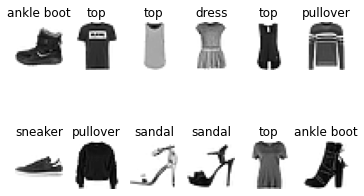

In [ ]:
%matplotlib inline
import tensorflow
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Activation, Flatten, Dropout, Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
import keras

from livelossplot import PlotLossesKeras
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

INIT_LR = 1e-4
BS = 64
EPOCHS = 30
DEPTH = 1
IMAGE_SHAPE = (28, 28)

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
CLASS_NAMES = ["top", "trouser", "pullover", "dress", "coat",
	             "sandal", "shirt", "sneaker", "bag", "ankle boot"]

NO_CLASSES = len(np.unique(y_train).tolist())
print("Names of classes:",CLASS_NAMES)

print("\nVisualising dataset...")
for i in range(12):
    plt.subplot(2,6,i+1)
    plt.axis('off')
    plt.title(CLASS_NAMES[y_train[i]])
    plt.imshow(x_train[i], cmap=plt.get_cmap('binary'))

In [ ]:
# normalising image data between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

# reshaping data according to keras backend
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))
y_train = y_train.reshape((-1,1))
y_test = y_test.reshape((-1,1))

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print("Train data shape:", x_train.shape)
print("Train labels shape:", y_train.shape)
print("Test data shape:", x_test.shape)
print("Test labels shape:", y_test.shape)
print("\nTotal no of classes:", NO_CLASSES)

Train data shape: (60000, 28, 28, 1)
Train labels shape: (600000, 10)
Test data shape: (10000, 28, 28, 1)
Test labels shape: (100000, 10)

Total no of classes: 10


In [ ]:
def CNN_model(width, height, depth, classes):
      # initialize the model along with the input shape
      model = Sequential()
      inputShape = (height, width, depth)

      model.add(Conv2D(32, (3, 3), padding="same", input_shape=inputShape))
      model.add(Activation("relu"))
      model.add(BatchNormalization())
      model.add(MaxPooling2D(pool_size=(3, 3)))
      model.add(Dropout(0.25))

      model.add(Conv2D(64, (3, 3), padding="same"))
      model.add(Activation("relu"))
      model.add(BatchNormalization())
      model.add(Conv2D(64, (3, 3), padding="same"))
      model.add(Activation("relu"))
      model.add(BatchNormalization())
      model.add(MaxPooling2D(pool_size=(2, 2)))
      model.add(Dropout(0.25))

      model.add(Flatten())
      model.add(Dense(1024))
      model.add(Activation("relu"))
      model.add(BatchNormalization())
      model.add(Dropout(0.25))

      model.add(Dense(512))
      model.add(Activation("relu"))
      model.add(BatchNormalization())
      model.add(Dropout(0.25))

      model.add(Dense(classes))
      model.add(Activation("softmax"))

      return model

In [ ]:
# construct the training image generator for data augmentation
aug = ImageDataGenerator(rotation_range=2, zoom_range=0.1, 
                         horizontal_flip=True, fill_mode="nearest")

print("Compiling model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR/EPOCHS)
model = CNN_model(width=IMAGE_SHAPE[0], height=IMAGE_SHAPE[1], depth=DEPTH, 
                        classes=NO_CLASSES)
model.compile(loss="categorical_crossentropy", optimizer=opt,
              metrics=["accuracy"])
model.summary()

Compiling model...
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 9, 9, 32)          0         
_________________________________________________________________
dropout (Dropout)            (None, 9, 9, 32)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 9, 9, 64)          18496     
_________________________________________________________________
activation_1 (Activation)    (None, 9

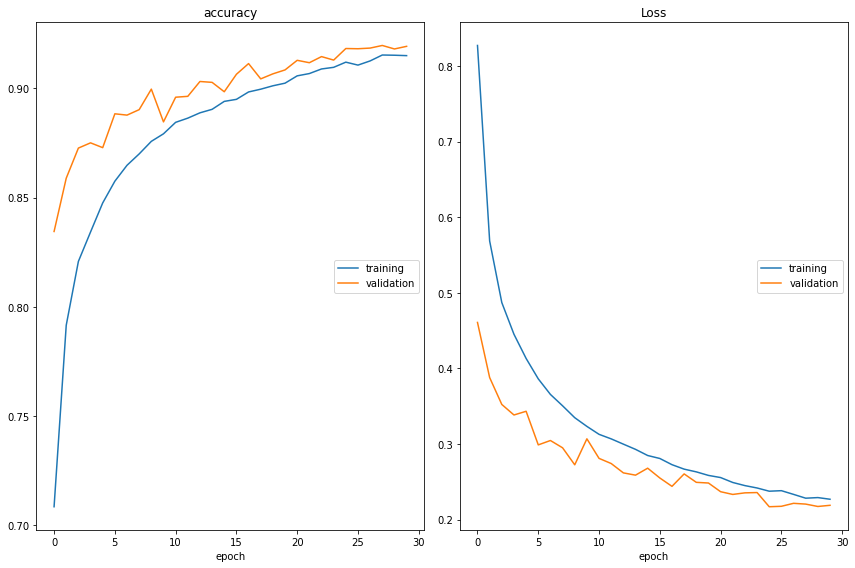

accuracy
	training         	 (min:    0.708, max:    0.915, cur:    0.915)
	validation       	 (min:    0.835, max:    0.920, cur:    0.919)
Loss
	training         	 (min:    0.227, max:    0.827, cur:    0.227)
	validation       	 (min:    0.217, max:    0.461, cur:    0.219)


In [ ]:
print("Training network for {} epochs...".format(EPOCHS))
H = model.fit_generator(aug.flow(x_train, y_train, batch_size=BS),
                          validation_data = (x_test, y_test),
                          steps_per_epoch = len(x_train) // BS,
                          epochs=EPOCHS,
                          callbacks = [PlotLossesKeras()] )

Prediciting and visualising...


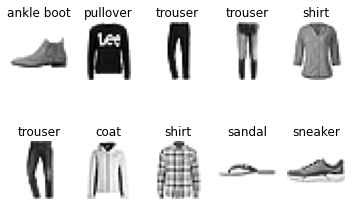

In [ ]:
y_pred = model.predict(x_test, batch_size=BS)

print("Prediciting and visualising...")
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.axis('off')
    plt.title(CLASS_NAMES[y_pred[i].argmax()])
    plt.imshow(x_test[i].reshape(28,28), cmap=plt.get_cmap('binary'))

In [ ]:
print("Classification per class...")
classification_report = classification_report(y_test.argmax(axis=1),
                          y_pred.argmax(axis=1), target_names=CLASS_NAMES)
print(classification_report)

Classification per class...
              precision    recall  f1-score   support

         top       0.91      0.82      0.86      1000
     trouser       0.98      0.99      0.99      1000
    pullover       0.87      0.88      0.88      1000
       dress       0.93      0.92      0.92      1000
        coat       0.90      0.83      0.87      1000
      sandal       0.98      0.99      0.99      1000
       shirt       0.72      0.83      0.77      1000
     sneaker       0.96      0.97      0.96      1000
         bag       0.98      0.99      0.99      1000
  ankle boot       0.97      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



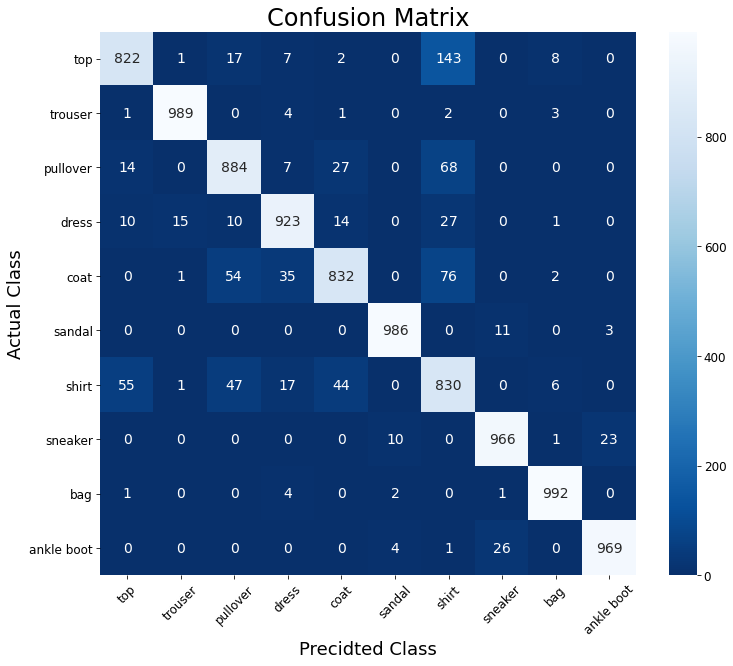

In [ ]:
plt.rcParams.update({'font.size': 12})

plt.figure(figsize=(12,10))
ax = plt.axes()

cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
hm = sb.heatmap(cm, annot=True, cmap='Blues_r', fmt="d", xticklabels=CLASS_NAMES,
                yticklabels=CLASS_NAMES, annot_kws={"size": 14}, cbar=True,
                )

ax.set_title('Confusion Matrix', y = 0, fontsize=24)
ax.tick_params(direction='out',length=4)
plt.xlabel("Precidted Class", fontsize=18)
plt.ylabel("Actual Class",fontsize=18)
plt.xticks(rotation=45) 
plt.yticks(rotation=0) 
plt.show();

<Figure size 432x288 with 0 Axes>

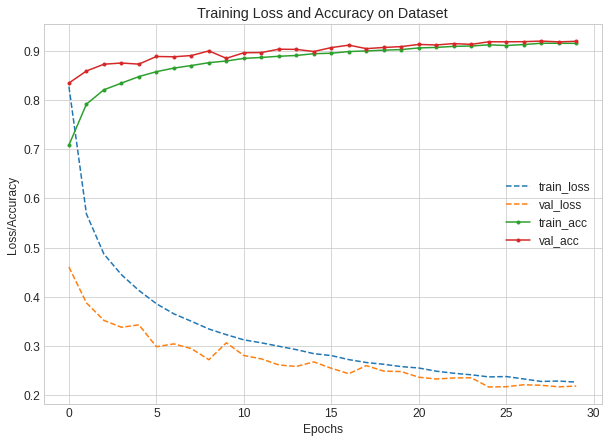

In [ ]:
# Ploting the training loss and accuracy
plt.clf()
plt.style.use("seaborn-whitegrid")
plt.figure(figsize=(10,7))

plt.plot(np.arange(0, EPOCHS), H.history["loss"], label="train_loss",linestyle='--')
plt.plot(np.arange(0, EPOCHS), H.history["val_loss"], label="val_loss",linestyle='--')
plt.plot(np.arange(0, EPOCHS), H.history["accuracy"], label="train_acc",marker=".")
plt.plot(np.arange(0, EPOCHS), H.history["val_accuracy"], label="val_acc",marker=".")

plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epochs")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="best")
plt.savefig('acc.png')